In [619]:
from scipy.spatial import KDTree
import numpy as np
from pprint import pp
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [620]:
# Example
points_ref = np.array([(1, 1), (3, 3), (4, 4), (5, 4), (6, 6)])
tree = KDTree(points_ref)
idx = tree.query_ball_point((4, 4), 2)
pp(idx)
pp(points_ref[idx])

[1, 2, 3]
array([[3, 3],
       [4, 4],
       [5, 4]])


In [621]:
ncol = 2
nZones = 4
nrows = nZones

cols = [f"W{i+1}" for i in range(ncol)]
X = pd.DataFrame(np.random.random(size=(nrows, ncol)), columns=cols)
y = [i for i in range(nrows)]
y = pd.Series(y)
y.name = "y"
zoneCentroid = pd.concat([y, X], axis=1)
display(zoneCentroid)

,y,W1,W2
0,0,0.506368,0.584381
1,1,0.394371,0.808610
2,2,0.765826,0.453196
3,3,0.442596,0.280909


In [622]:
nrows = 200
X = pd.DataFrame(np.random.random(size=(nrows, ncol)), columns=cols)
ufp = pd.DataFrame(X, columns=cols)
display(ufp)

,W1,W2
0,0.803360,0.100095
1,0.863555,0.509255
2,0.535763,0.637348
3,0.410590,0.372820
4,0.382247,0.432125
...,...,...
195,0.381405,0.203446
196,0.424768,0.354165
197,0.545025,0.673584
198,0.180049,0.735418


<Axes: xlabel='W1', ylabel='W2'>

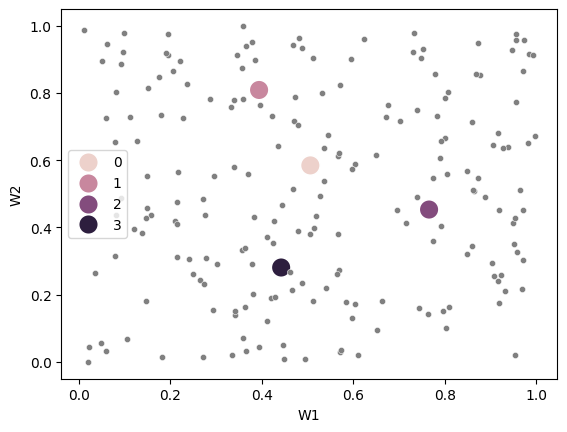

In [623]:
fig, ax = plt.subplots()
sns.scatterplot(zoneCentroid, x="W1", y="W2", hue="y", ax=ax, s=200)
sns.scatterplot(ufp, x="W1", y="W2", ax=ax, color="gray", s=20)

In [624]:
zoneCentroid[cols]

,W1,W2
0,0.506368,0.584381
1,0.394371,0.808610
2,0.765826,0.453196
3,0.442596,0.280909


In [625]:
# Figure out the nearest neighbor
tree = KDTree(zoneCentroid[cols])

distArr, idxArr = tree.query(zoneCentroid[cols], k=5)

pp(distArr)
pp(idxArr)

for row in range(zoneCentroid.shape[0]):
    dist = distArr[row][1]
    idx = idxArr[row][1]
    pp(f"Closest neighbor for point {zoneCentroid.loc[row,"y"]} is {zoneCentroid.loc[idx,"y"]} with distance = {dist}")    
    
zoneCentroid["nnIdx"] = idxArr[:,1]
zoneCentroid["minDist"] = distArr[:,1]
display(zoneCentroid)

array([[0.        , 0.25064307, 0.29073698, 0.31010028,        inf],
       [0.        , 0.25064307, 0.51409943, 0.5299    ,        inf],
       [0.        , 0.29073698, 0.36627859, 0.51409943,        inf],
       [0.        , 0.31010028, 0.36627859, 0.5299    ,        inf]])
array([[0, 1, 2, 3, 4],
       [1, 0, 2, 3, 4],
       [2, 0, 3, 1, 4],
       [3, 0, 2, 1, 4]], dtype=int64)
'Closest neighbor for point 0 is 1 with distance = 0.2506430737805476'
'Closest neighbor for point 1 is 0 with distance = 0.2506430737805476'
'Closest neighbor for point 2 is 0 with distance = 0.2907369773853904'
'Closest neighbor for point 3 is 0 with distance = 0.31010027510321336'


,y,W1,W2,nnIdx,minDist
0,0,0.506368,0.584381,1,0.250643
1,1,0.394371,0.808610,0,0.250643
2,2,0.765826,0.453196,0,0.290737
3,3,0.442596,0.280909,0,0.310100


In [626]:
tree = KDTree(ufp[cols])

def rowFn(row):
    point = row[cols].values
    minDist = row["minDist"]
    res = tree.query_ball_point(point, minDist/2)
    return res


nb = zoneCentroid.apply(rowFn, axis=1)
nb

0    [2, 128, 43, 34, 77, 133, 110, 55, 134, 197, 122]
1      [40, 19, 57, 97, 178, 46, 69, 176, 183, 141, 7]
2    [112, 71, 90, 95, 73, 51, 8, 175, 139, 12, 1, ...
3    [11, 117, 195, 119, 116, 80, 157, 68, 3, 196, ...
dtype: object

In [627]:
ufp.iloc[nb[0], :]

,W1,W2
2,0.535763,0.637348
128,0.468197,0.514269
43,0.526800,0.493430
34,0.435692,0.642473
77,0.480122,0.703158
133,0.597301,0.574789
110,0.535816,0.538557
55,0.566317,0.611664
134,0.568919,0.619971
197,0.545025,0.673584


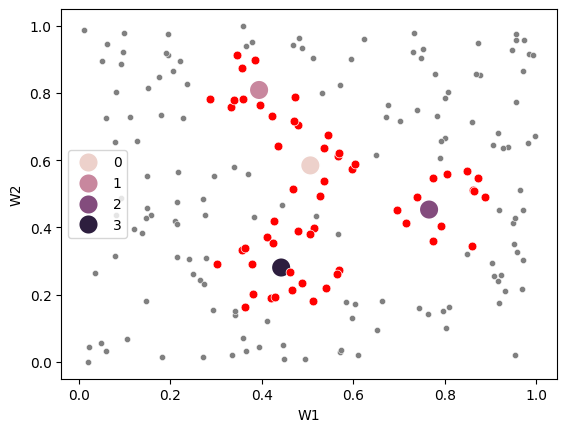

In [628]:
fig, ax = plt.subplots()
sns.scatterplot(zoneCentroid, x="W1", y="W2", hue="y", ax=ax, s=200)
sns.scatterplot(ufp, x="W1", y="W2", ax=ax, color="gray", s=20)

for i in range(zoneCentroid.shape[0]):
    nPoints = ufp.iloc[nb[i], :]
    sns.scatterplot(nPoints, x="W1", y="W2", ax=ax, color="red", s=40)